In [3]:
from fronts_era5 import era5_eg3_read, calc_fronts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import datetime as dt
import numpy as np
import xarray as xr

In [4]:
#Define the time bounds (between which data is loaded), as well as the time to plot
time = [dt.datetime(2007,1,19), dt.datetime(2007,1,22)]
t_plot = "2007-01-20 12:00"

#Load 6-hourly 850 hPa data  between the two times given.
#Data includes wind components (u, v, m/s), air temp (t, dec C), specific humidity (q)
#Data stored in arrays, with dimensions [time, lat, lon]
u, v, q, t, lon, lat, date_list = era5_eg3_read(time)

#Calculate equivalent potential temperature (thetae), the magnitude of the thetae gradient, the thermal front parameter, and the frontal velocity
thetae, mag_te, tfp, v_f = calc_fronts(u, v, q, t, lon, lat, date_list)

/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/metpy/calc/thermo.py:699: UserWarning: Relative humidity >120%, ensure proper units.
  warnings.warn('Relative humidity >120%, ensure proper units.')
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/pint/quantity.py:888: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in greater_equal


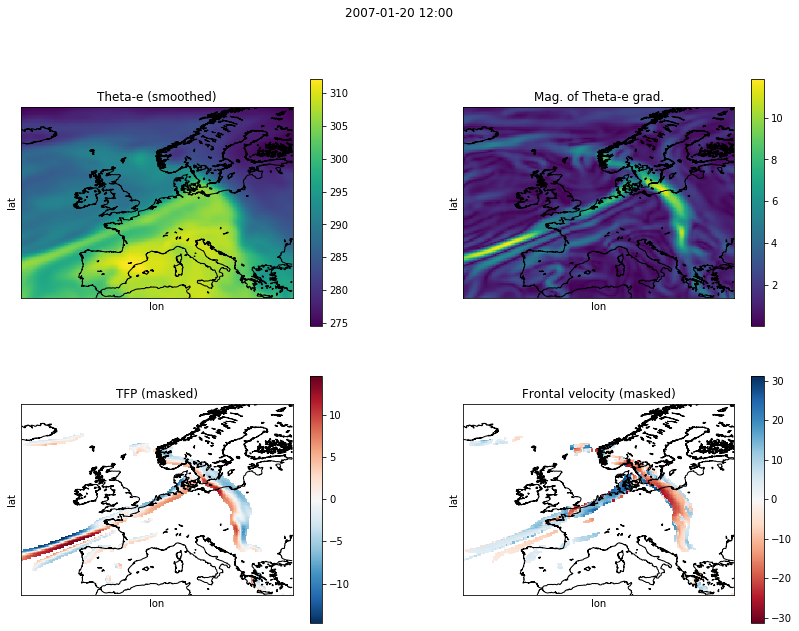

In [6]:
#Firstly, plot thermal front diagnostics for "cyclone Lancelot", from January 2007. This case is studied in Rudisuhli et al. (2018) 
# using similar methods, which allows for compairson.

#Plot the (smoothed) theta-e field
plot_ind = np.where(date_list == np.datetime64(t_plot))[0][0]
m = Basemap(llcrnrlon=-20, llcrnrlat=30, urcrnrlon=30, urcrnrlat=70, resolution="i")
plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
m.drawcoastlines()
d = xr.DataArray(thetae[plot_ind], dims=("lat","lon"), coords=(lat,lon))	
d = d.assign_coords(lon=(((d.lon + 180) % 360) - 180)).sortby('lon')
d.sel({"lon":slice(-20,30), "lat":slice(70,35)}).plot()
plt.title("Theta-e (smoothed)")    

#Plot the magnitude of the theta-e gradient
plt.subplot(2,2,2)
m.drawcoastlines()
d = xr.DataArray(mag_te[plot_ind], dims=("lat","lon"), coords=(lat,lon))
d = d.assign_coords(lon=(((d.lon + 180) % 360) - 180)).sortby('lon')
d.sel({"lon":slice(-20,30), "lat":slice(70,35)}).plot()
plt.title("Mag. of Theta-e grad.")    

#Plot the thermal front parameter. Mask points where the magnitude of the thetae gradient is 4 K/100 km or less.
#Fronts are often drawn where the magnitude of this parameter is zero. 
plt.subplot(2,2,3)
m.drawcoastlines()
d = xr.where(mag_te[plot_ind]>4, xr.DataArray(tfp[plot_ind], dims=("lat","lon"), coords=(lat,lon)), np.nan)
d = d.assign_coords(lon=(((d.lon + 180) % 360) - 180)).sortby('lon')
d.sel({"lon":slice(-20,30), "lat":slice(70,35)}).plot()
plt.title("TFP (masked)")    

#Plot the frontal velocity. Positive values represent cold air advection. Mask where fronts are slower than 3 m/s, as well as where the
#magnitude of the thetae gradient is less than 4
plt.subplot(2,2,4)
m.drawcoastlines()
d = xr.where((mag_te[plot_ind]>=4) & (abs(v_f[plot_ind])>=3), xr.DataArray(v_f[plot_ind], dims=("lat","lon"), coords=(lat,lon)), np.nan)
d = d.assign_coords(lon=(((d.lon + 180) % 360) - 180)).sortby('lon')
d.sel({"lon":slice(-20,30), "lat":slice(70,35)}).plot(cmap=plt.get_cmap("RdBu"))
plt.title("Frontal velocity (masked)")    
plt.suptitle(t_plot)
plt.subplots_adjust(wspace=0.3)
plt.savefig("/g/data/eg3/ab4502/figs/tfp_"+t_plot+".png")    

/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater_equal


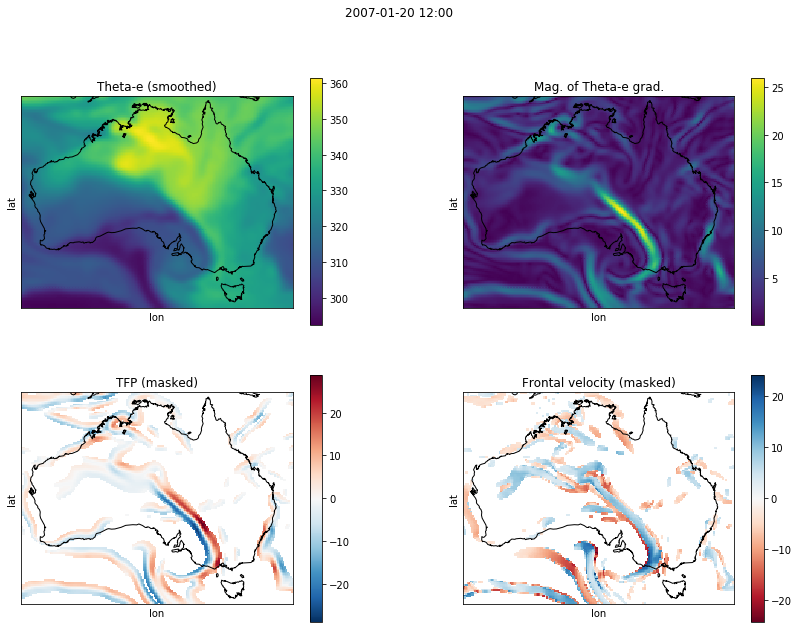

In [7]:
#At the same time as cyclone Lancelot, there is a relatively strong and complex front impacting Australia. Plot for the Australia domain.

start_lat = -44.525; end_lat = -9.975; start_lon = 111.975; end_lon = 156.275
m = Basemap(llcrnrlon = start_lon, llcrnrlat = start_lat, urcrnrlon = end_lon, \
            urcrnrlat = end_lat, projection="cyl", resolution = "l")
plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
m.drawcoastlines()
d = xr.DataArray(thetae[plot_ind], dims=("lat","lon"), coords=(lat,lon))	
d.sel({"lon":slice(start_lon,end_lon), "lat":slice(end_lat, start_lat)}).plot()
plt.title("Theta-e (smoothed)")    

plt.subplot(2,2,2)
m.drawcoastlines()
d = xr.DataArray(mag_te[plot_ind], dims=("lat","lon"), coords=(lat,lon))
d.sel({"lon":slice(start_lon,end_lon), "lat":slice(end_lat,start_lat)}).plot()
plt.title("Mag. of Theta-e grad.")    

plt.subplot(2,2,3)
m.drawcoastlines()
d = xr.where(mag_te[plot_ind]>4, xr.DataArray(tfp[plot_ind], dims=("lat","lon"), coords=(lat,lon)), np.nan)
d.sel({"lon":slice(start_lon,end_lon), "lat":slice(end_lat,start_lat)}).plot()

plt.title("TFP (masked)")    

plt.subplot(2,2,4)
m.drawcoastlines()
d = xr.where((mag_te[plot_ind]>4) & (abs(v_f[plot_ind])>=3), xr.DataArray(v_f[plot_ind], dims=("lat","lon"), coords=(lat,lon)), np.nan)
d = d.assign_coords(lon=(((d.lon + 180) % 360) - 180)).sortby('lon')
d.sel({"lon":slice(start_lon,end_lon), "lat":slice(end_lat,start_lat)}).plot(cmap=plt.get_cmap("RdBu"))
plt.title("Frontal velocity (masked)")    
plt.suptitle(t_plot)
plt.subplots_adjust(wspace=0.3)
